In [27]:
import pandas as pd
import numpy as np
import scipy.stats.stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats.stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import itertools
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [28]:
data = pd.read_excel('C:/Users/ravit/Downloads/car prediction.xlsx')

In [29]:
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn. preprocessing import LabelEncoder 

In [31]:
label_encoder = {}
for column in data.columns:
    label_encoder[column] = LabelEncoder()
    data[column] = label_encoder[column].fit_transform(data[column])

In [60]:
 data.groupby('Column7').count()

,Column1,Column2,Column3,Column4,Column5,Column6
Column7,,,,,,
0,384,384,384,384,384,384
1,69,69,69,69,69,69
2,1210,1210,1210,1210,1210,1210
3,65,65,65,65,65,65


In [64]:
data.groupby(['Column1']).count()

,Column2,Column3,Column4,Column5,Column6,Column7
Column1,,,,,,
0,432,432,432,432,432,432
1,432,432,432,432,432,432
2,432,432,432,432,432,432
3,432,432,432,432,432,432


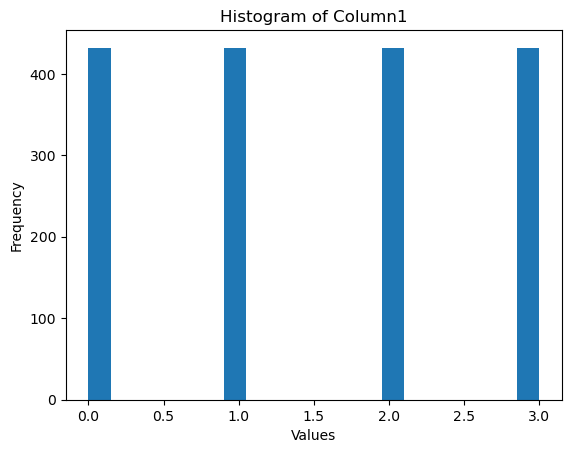

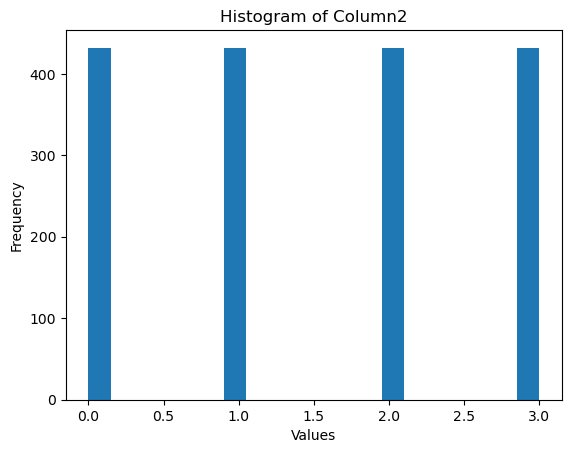

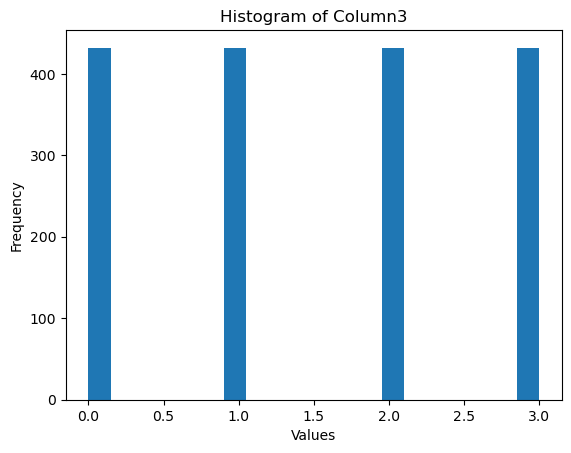

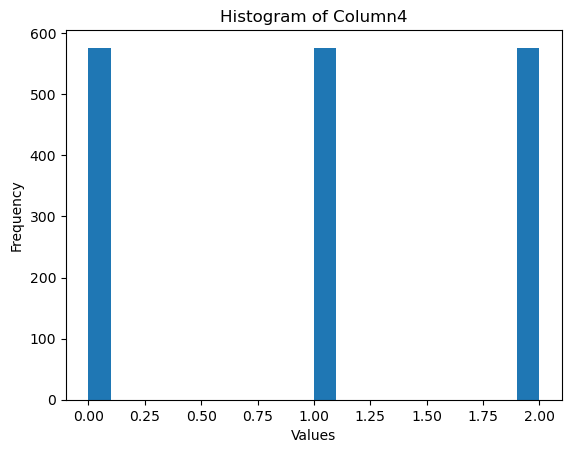

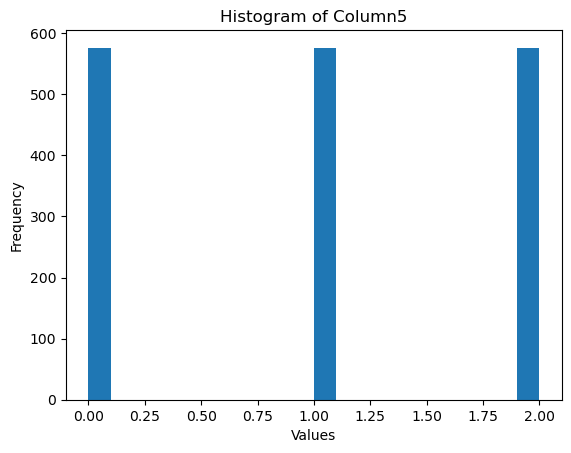

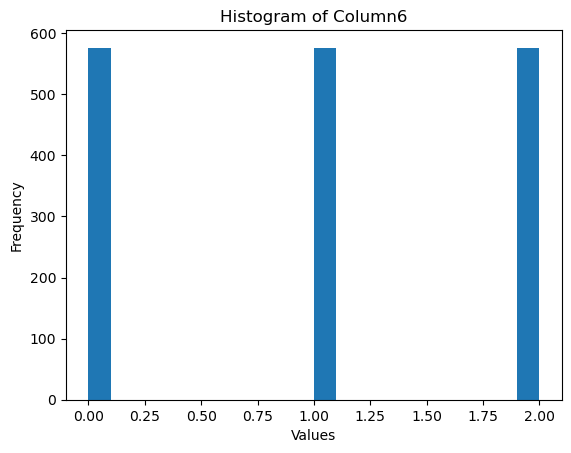

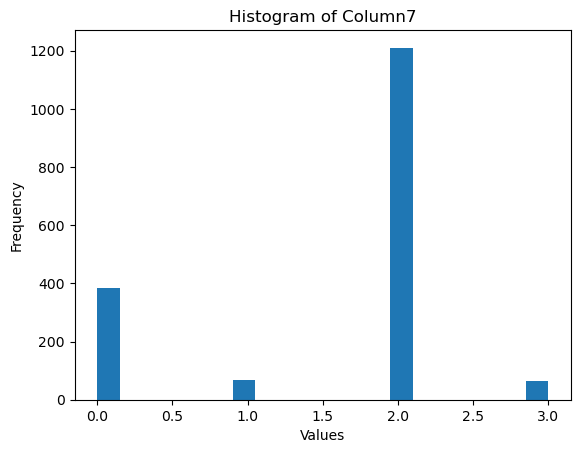

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame
for column in data.columns:
    column_data = data[column]
    
    # Check if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(column_data):
        # For numerical columns, use a histogram
        plt.hist(column_data, bins=20)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()
    else:
        # For categorical columns, use a bar plot or pie chart depending on the number of unique categories
        unique_values = column_data.value_counts()
        num_unique = len(unique_values)
        
        if num_unique <= 10:
            # If there are fewer than or equal to 10 unique categories, use a bar plot
            plt.bar(unique_values.index, unique_values.values)
            plt.xlabel('Categories')
            plt.ylabel('Count')
            plt.title(f'Bar Plot of {column}')
            plt.xticks(rotation=90)
            plt.show()
        else:
            # If there are more than 10 unique categories, use a pie chart
            plt.pie(unique_values, labels=unique_values.index, autopct='%1.1f%%')
            plt.title(f'Pie Chart of {column}')
            plt.axis('equal')
            plt.show()



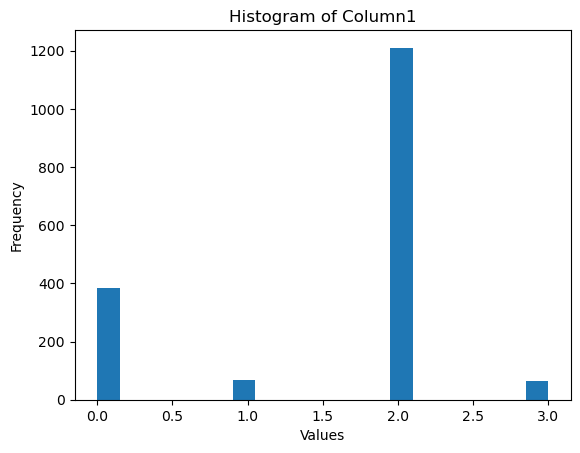

In [73]:
import matplotlib.pyplot as plt

# Visualization for a numerical column (e.g., 'Column1')
plt.hist(data['Column7'], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column1')
plt.show()


In [32]:
print(data)

      Column1  Column2  Column3  Column4  Column5  Column6  Column7
0           3        3        0        0        2        1        2
1           3        3        0        0        2        2        2
2           3        3        0        0        2        0        2
3           3        3        0        0        1        1        2
4           3        3        0        0        1        2        2
...       ...      ...      ...      ...      ...      ...      ...
1723        1        1        3        2        1        2        1
1724        1        1        3        2        1        0        3
1725        1        1        3        2        0        1        2
1726        1        1        3        2        0        2        1
1727        1        1        3        2        0        0        3

[1728 rows x 7 columns]


In [33]:
X=data.drop(['Column7'],axis=1)

In [34]:
y= data.iloc[:,-1]

In [35]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X=data.drop(['Column7','Column3'],axis=1)

y= data.iloc[:,-1]
# Assume you have loaded your real-life dataset into the following variables:
# X: Array containing the features (categorical columns) without one-hot encoding
# y: Array containing the target labels

# Step 1: One-hot encode the categorical features
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)
y_reshaped = y.values.reshape(-1, 1)
y_encoded = encoder.fit_transform(y_reshaped)


# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y_encoded, test_size=0.3, random_state=42)

# Step 3: Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14, activation='softmax', input_shape=(X_encoded.shape[1],)),
    tf.keras.layers.Dense(2, activation='softmax'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))

# Step 6: Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")


Epoch 1/100


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


25/25 [==============================] - 1s 12ms/step - loss: 1.4152 - accuracy: 0.2200 - val_loss: 1.3760 - val_accuracy: 0.2274
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 1.3452 - accuracy: 0.2200 - val_loss: 1.3116 - val_accuracy: 0.2274
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2832 - accuracy: 0.2200 - val_loss: 1.2546 - val_accuracy: 0.2274
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2288 - accuracy: 0.2200 - val_loss: 1.2045 - val_accuracy: 0.2274
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.1798 - accuracy: 0.6749 - val_loss: 1.1595 - val_accuracy: 0.6898
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 1.1367 - accuracy: 0.7047 - val_loss: 1.1204 - val_accuracy: 0.6898
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.7047 - val_loss: 1.0865 - val_accuracy: 0.6898
Epoch 8/100
25/25 [=====

C:\Users\ravit\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9345
Test accuracy: 0.9344894289970398


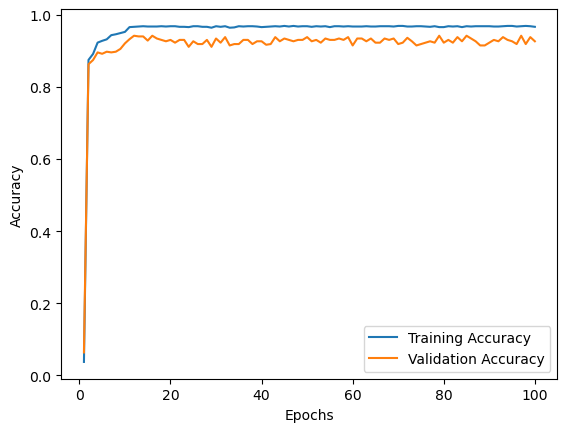

In [42]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

X = data.drop(['Column7', 'Column3'], axis=1)
y = data.iloc[:, -1]

# Step 1: One-hot encode the categorical features
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Reshape y to a 2D array with a single column
y_reshaped = y.values.reshape(-1, 1)
y_encoded = encoder.fit_transform(y_reshaped)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Step 3: Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(21, activation='softmax', input_shape=(X_encoded.shape[1],)),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize lists to store training and validation accuracy during training
train_accuracy = []
val_accuracy = []

# Set the number of epochs
epochs = 100

# Step 5: Train the model on the training data and record accuracy during training
for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test), verbose=0)
    train_accuracy.append(history.history['accuracy'][0])
    val_accuracy.append(history.history['val_accuracy'][0])

# Step 6: Evaluate the model on the test data
loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Step 7: Plot the training and validation accuracy over epochs
plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
